# Exploratory Data Analysis
- Import Data
- Light Data Cleaning
- Correlation Visualizations
- General Visualization + Analysis

## Importing Data

In [1]:
# Mount Drive, Data is saved on my google drive account
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import pytz # Date time from UTC to PDT
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize some colors
R = "\033[91m"  # Red text
W = "\033[0m"   # Reset to default
G = "\033[92m"  # Green text

Mounted at /content/drive


In [2]:
# Initialize Root directory and path to pickle
PROJECT_ROOT = '/content/drive/MyDrive/IDS'
PATH = os.path.join(PROJECT_ROOT, "pkl")
DATA_PATH = os.path.join(PROJECT_ROOT, 'data/data.pkl')

In [3]:
# Load Data
try:
  data = pd.read_pickle(DATA_PATH)
  print(f'{G} Data Loaded! {W}')
except:
  print(f'{R} Data Not Found! {W}')
data

 Data Loaded! 


,ts,uid,src_ip,src_p,dst_ip,dst_p,proto,service,duration,src_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,ip_proto
0,1.740197e+09,Covuo43LyFTNEu1Cp7,10.0.0.5,65430,99.181.107.78,443,tcp,-,0.176656,0,...,T,F,0,^dAtt,34,1876,169,237196,-,6
1,1.740197e+09,CGgOtJ35xc6GxibRug,10.0.0.5,65289,140.82.112.26,443,tcp,-,0.089289,24,...,T,F,0,^dADFaRfR,6,300,5,325,-,6
2,1.740197e+09,CX6Ki51nhyiL2A6494,10.0.0.5,65430,99.181.107.78,443,tcp,-,0.213978,1544,...,T,F,0,^dAttDa,29,3088,120,161605,-,6
3,1.740197e+09,CTSvKvuTLQBocHrOj,2601:647:cf01:5340:6d8b:e871:9ba9:5a18,52768,2001:558:feed::1,53,udp,dns,0.019330,33,...,F,F,0,Dd,1,81,1,131,-,17
4,1.740197e+09,CtmXoQ1bMnUBBi68Pa,2601:647:cf01:5340:6d8b:e871:9ba9:5a18,55558,2001:558:feed::1,53,udp,dns,0.017523,33,...,F,F,0,Dd,1,81,1,109,-,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589525,1.741251e+09,Cl9V7o3d5gUzwxmAmg,2601:647:cf01:5340:fa79:aff:fed6:65fb,1,2601:647:cf01:5340:210d:b639:9608:b036,0,icmp,-,156.840116,8290,...,F,F,0,-,97,12946,0,0,-,58
589526,1.741251e+09,CHc7xm1HIc1M2STFq7,fe80::833:d877:dbce:6f45,135,fe80::fa79:aff:fed6:65fb,136,icmp,-,838.535921,840,...,T,T,0,-,35,2520,35,2240,-,58
589527,1.741251e+09,C9j7yS2Mqpn8AqAIVc,fe80::833:d877:dbce:6f45,136,fe80::fa79:aff:fed6:65fb,135,icmp,-,871.438452,576,...,T,T,0,-,36,2304,16,1152,-,58
589528,1.741251e+09,ChOLqy4F73Wl6qIVsj,73.92.54.210,3,10.0.0.5,1,icmp,-,892.440025,122608,...,F,T,0,-,1703,170292,0,0,-,1


## Data Cleaning
* Set data types
* Check for NaN and Null values
* Drop columns for distribution visualizations

In [4]:
# Simple cleaning
# data.isnull().sum() # Zero is null
# data.isna().sum() # Zero is na
def visualization_clean(df):

    # SO IMPORTANT so pandas resets index whenever it wants i guess...
    if df.index.name == 'ts' or 'ts' not in df.columns:
        df = df.reset_index()

    # Change ts to datetime and to PDT
    df['ts'] = pd.to_datetime(df['ts'], unit='s')
    df['ts'] = df['ts'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
    df.set_index('ts', inplace=True)

    # Data Type Assignment
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convert duration to numeric (coerce invalid values to NaN)
    df['src_bytes'] = pd.to_numeric(df['src_bytes'], errors='coerce')  # Convert orig_bytes to numeric
    df['dst_bytes'] = pd.to_numeric(df['dst_bytes'], errors='coerce')  # Convert resp_bytes to numeric
    df['orig_pkts'] = pd.to_numeric(df['orig_pkts'], errors='coerce')  # Convert orig_pkts to numeric
    df['resp_pkts'] = pd.to_numeric(df['resp_pkts'], errors='coerce')  # Convert resp_pkts to numeric
    df['orig_ip_bytes'] = pd.to_numeric(df['orig_ip_bytes'], errors='coerce')  # Convert orig_ip_bytes to numeric
    df['resp_ip_bytes'] = pd.to_numeric(df['resp_ip_bytes'], errors='coerce')  # Convert resp_ip_bytes to numeric
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convert duration to numeric



    return df
print('data.info()')
print(data.info())
print('data.describe()')
print(data.describe())
print('data.isna().sum()')
print(data.isna().sum())
print('data.isnull().sum()')
print(data.isnull().sum())
print('data.value_counts()')
print(data.value_counts())
v_data = visualization_clean(data)
v_data = v_data.reset_index()
print('v_data.info()')
v_data.info()

data.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589530 entries, 0 to 589529
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ts              589530 non-null  float64
 1   uid             589530 non-null  object 
 2   src_ip          589530 non-null  object 
 3   src_p           589530 non-null  int64  
 4   dst_ip          589530 non-null  object 
 5   dst_p           589530 non-null  int64  
 6   proto           589530 non-null  object 
 7   service         589530 non-null  object 
 8   duration        589530 non-null  object 
 9   src_bytes       589530 non-null  object 
 10  dst_bytes       589530 non-null  object 
 11  conn_state      589530 non-null  object 
 12  local_orig      589530 non-null  object 
 13  local_resp      589530 non-null  object 
 14  missed_bytes    589530 non-null  int64  
 15  history         589530 non-null  object 
 16  orig_pkts       589530 non-null  int64  
 17

In [5]:
# Lets look at tunnel parents
# v_data['tunnel_parents'].value_counts()
# Yieled all rows '-'
if 'tunnel_parents' in v_data.columns:
  v_data['tunnel_parents']
  v_data['tunnel_parents'].value_counts()
  v_data = v_data.drop(columns=['tunnel_parents'])
else:
  print(v_data.columns)

In [6]:
# Create a new df dropping ip's, history, ports, uid, conn_state, local_orig, local_resp, history, ts

def drop_categorical(df):
  temp = df.drop(columns=['src_ip', 'uid', 'dst_ip', 'proto', 'service', 'conn_state', 'local_orig', 'local_resp', 'history', 'ts'])
  return temp
n_data = drop_categorical(v_data)
n_data

,src_p,dst_p,duration,src_bytes,dst_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,ip_proto
0,65430,443,0.176656,0.0,228408.0,0,34,1876,169,237196,6
1,65289,443,0.089289,24.0,65.0,0,6,300,5,325,6
2,65430,443,0.213978,1544.0,156813.0,0,29,3088,120,161605,6
3,52768,53,0.019330,33.0,83.0,0,1,81,1,131,17
4,55558,53,0.017523,33.0,61.0,0,1,81,1,109,17
...,...,...,...,...,...,...,...,...,...,...,...
589525,1,0,156.840116,8290.0,0.0,0,97,12946,0,0,58
589526,135,136,838.535921,840.0,560.0,0,35,2520,35,2240,58
589527,136,135,871.438452,576.0,384.0,0,36,2304,16,1152,58
589528,3,1,892.440025,122608.0,0.0,0,1703,170292,0,0,1


## Data Visualization
- Numerical data (n_data)
  - Correlation/distribution visualizations
    - Heatmap
    - Histogram
- All data (v_data)
  - In depth attribute analysis
    - common protocolos, ip's, ports etc...
    - network distribution per day
    - general stats

### Numerical Analysis

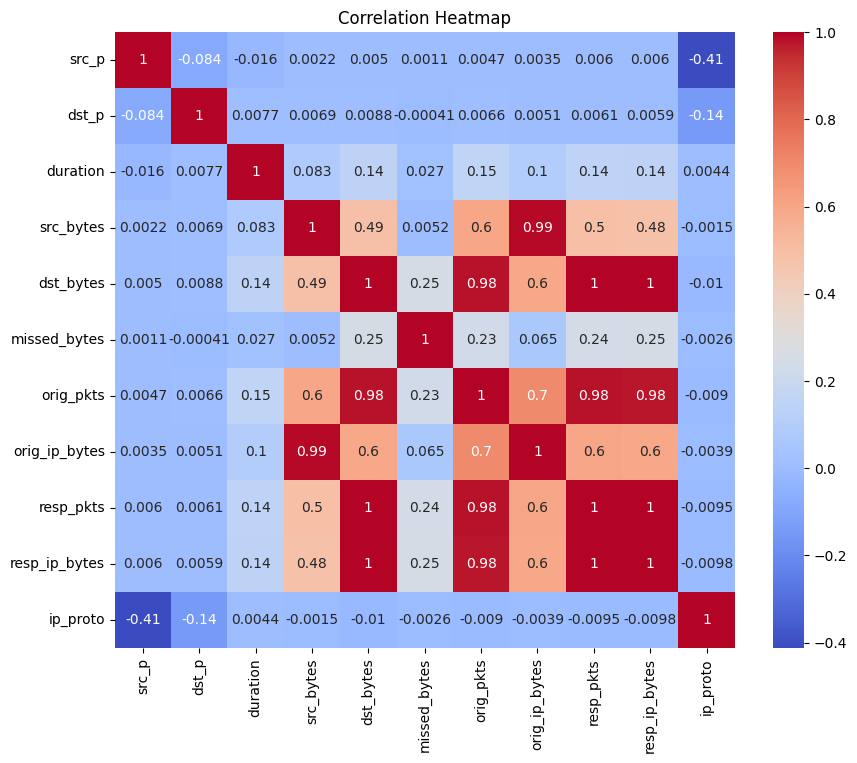

In [7]:
# HeatMap
plt.figure(figsize=(10, 8))
sns.heatmap(n_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

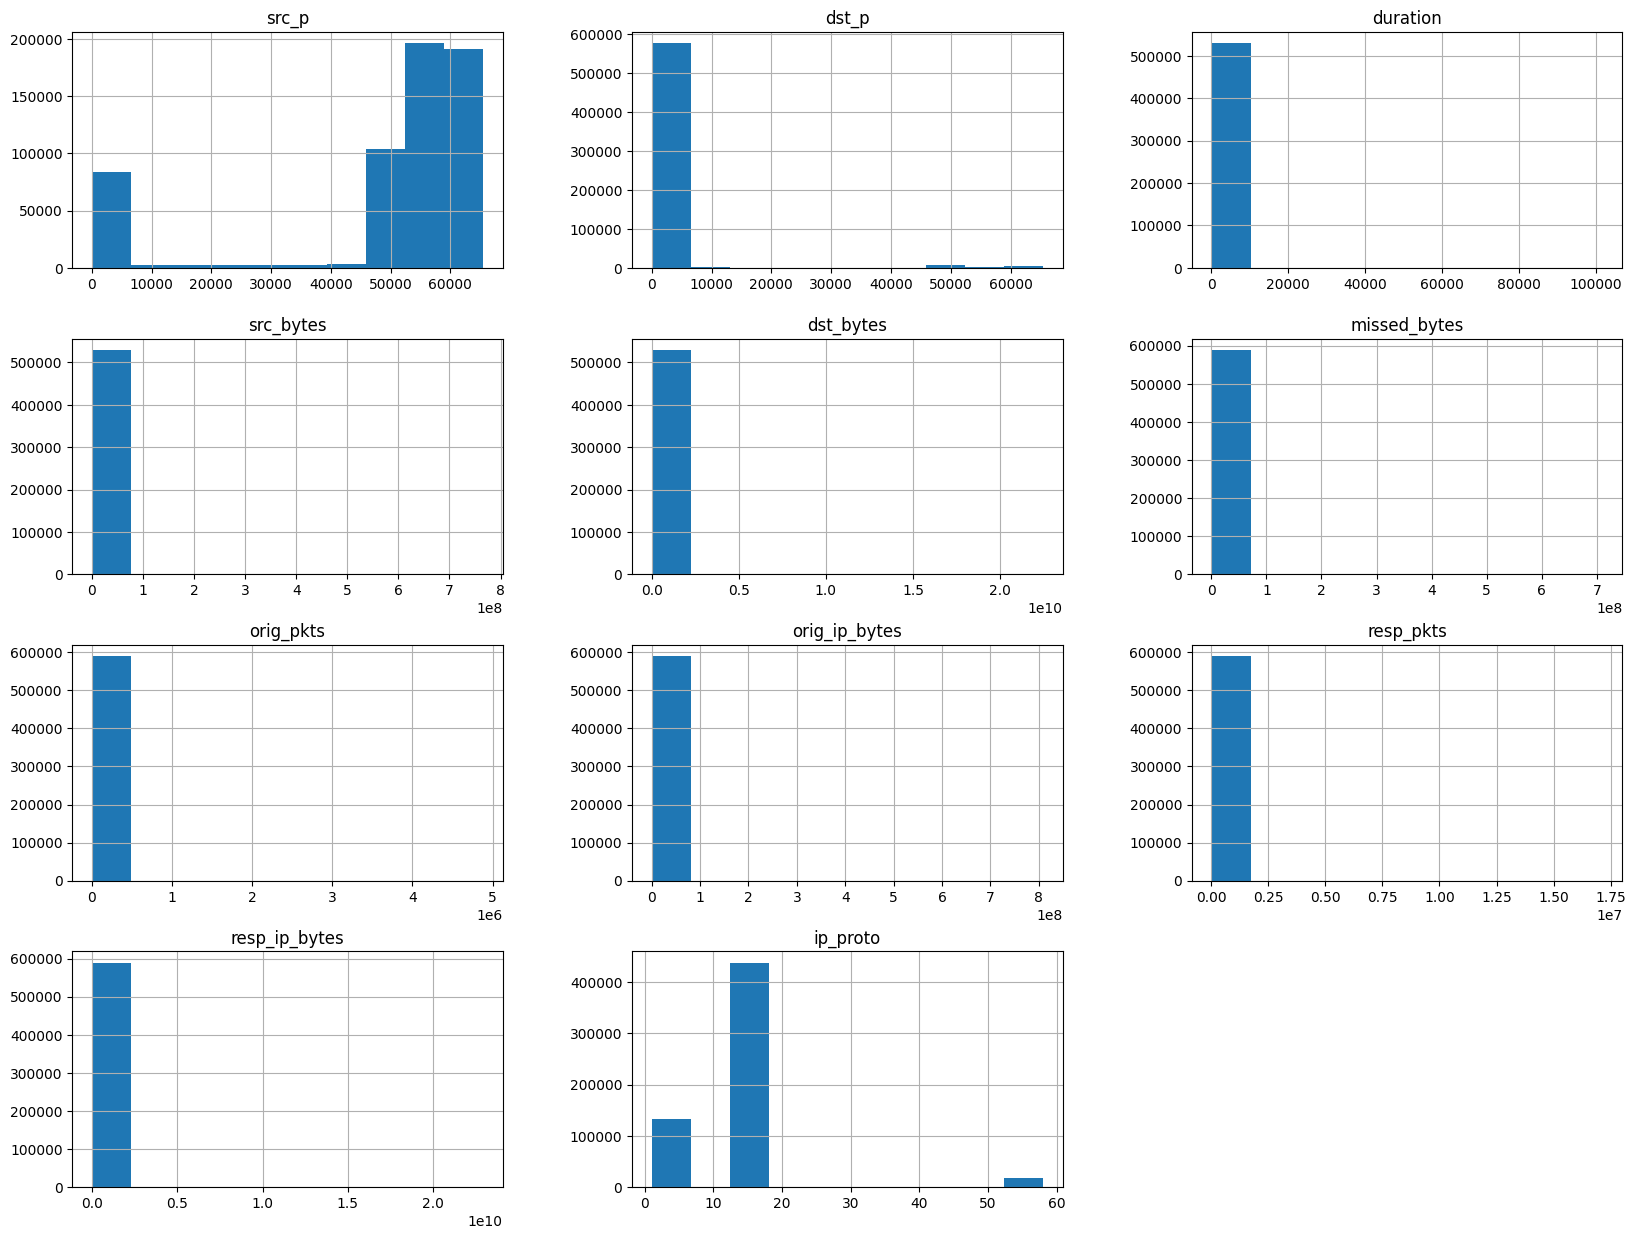

In [8]:
# Histogram
n_data.hist( figsize=(20, 15))
plt.show()

### Numerical Analysis
- Heatmap shows many correlated values, feature engineering needs to be considered
- Our histograms are as expected since given the dynamic nature and unique nature of network traffic

## All Data

Unique src IPs 357
Total Conenctions 589530


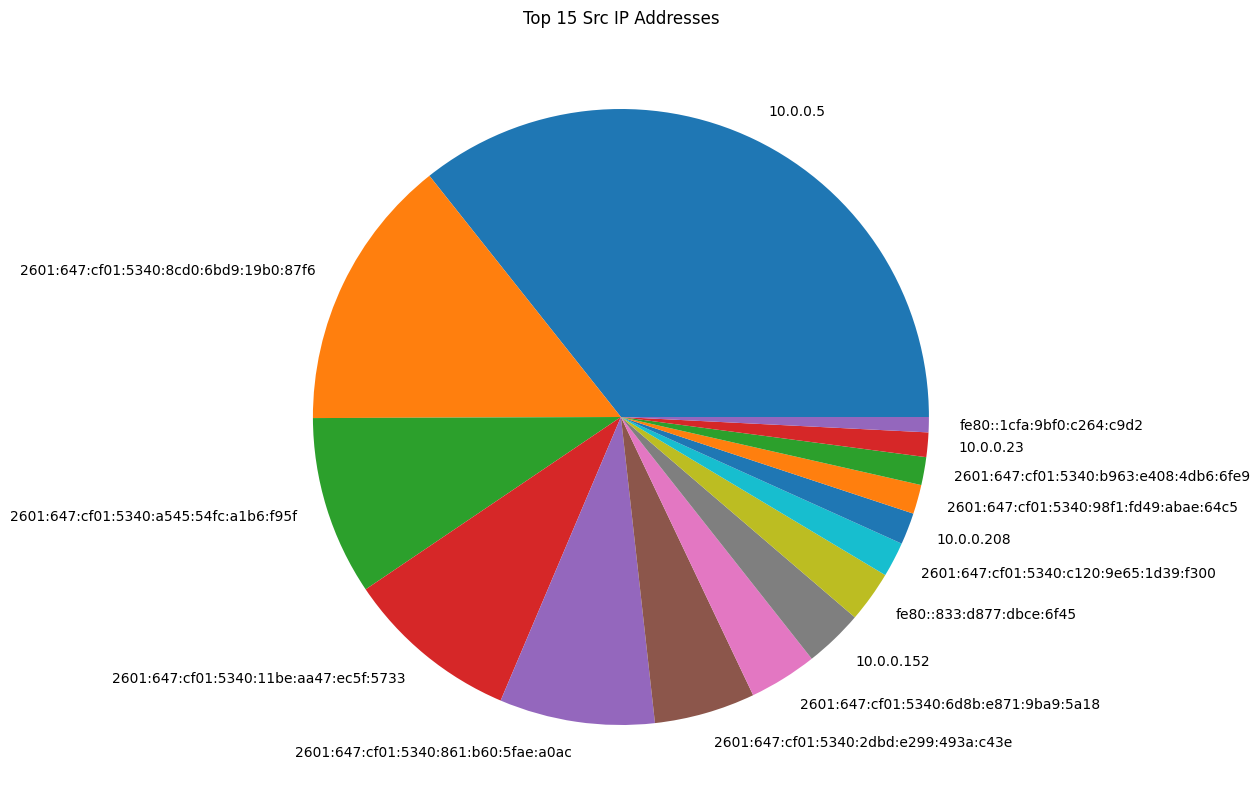

In [9]:
# General Stats
# Src ip
ip_counts = v_data['src_ip'].value_counts()[:15]
labels = ip_counts.index
values = ip_counts.values

fig, ax = plt.subplots()
ax.set_title('Top 15 Src IP Addresses')
fig.set_size_inches(10, 10)
ax.pie(values, labels=labels);

print('Unique src IPs', len(v_data['src_ip'].value_counts()))
print(f'Total Conenctions', len((v_data)))

Unique src Ports 31394
Total Conenctions 589530


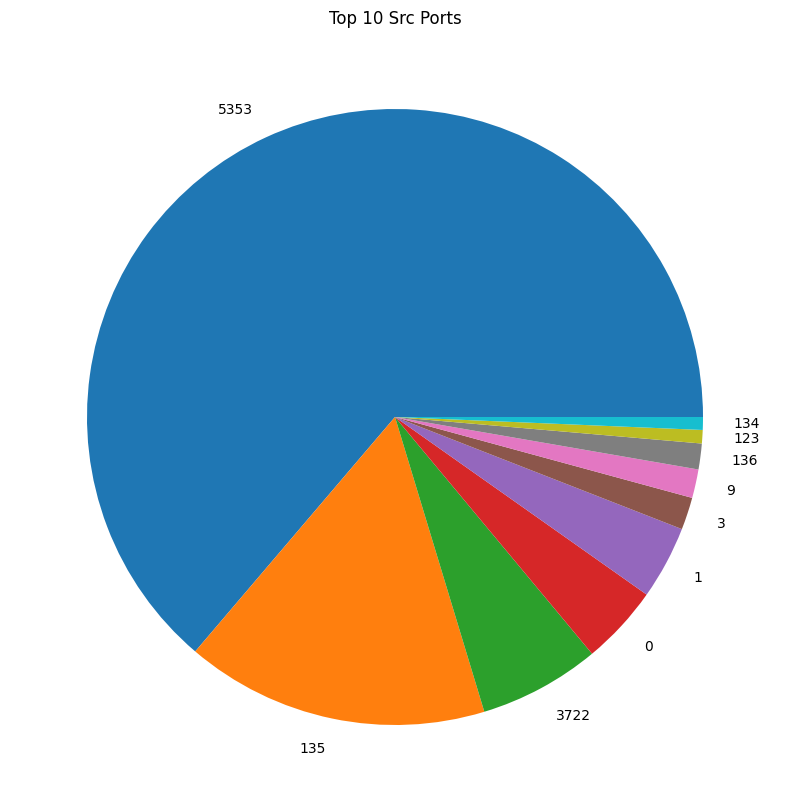

In [10]:
# src port
ip_counts = v_data['src_p'].value_counts()[:10]
labels = ip_counts.index
values = ip_counts.values

fig, ax = plt.subplots()
ax.set_title('Top 10 Src Ports')
fig.set_size_inches(10, 10)
ax.pie(values, labels=labels);

print('Unique src Ports', len(v_data['src_p'].value_counts()))
print(f'Total Conenctions', len((v_data)))

Unique dst IPs 6682
Total Conenctions 589530


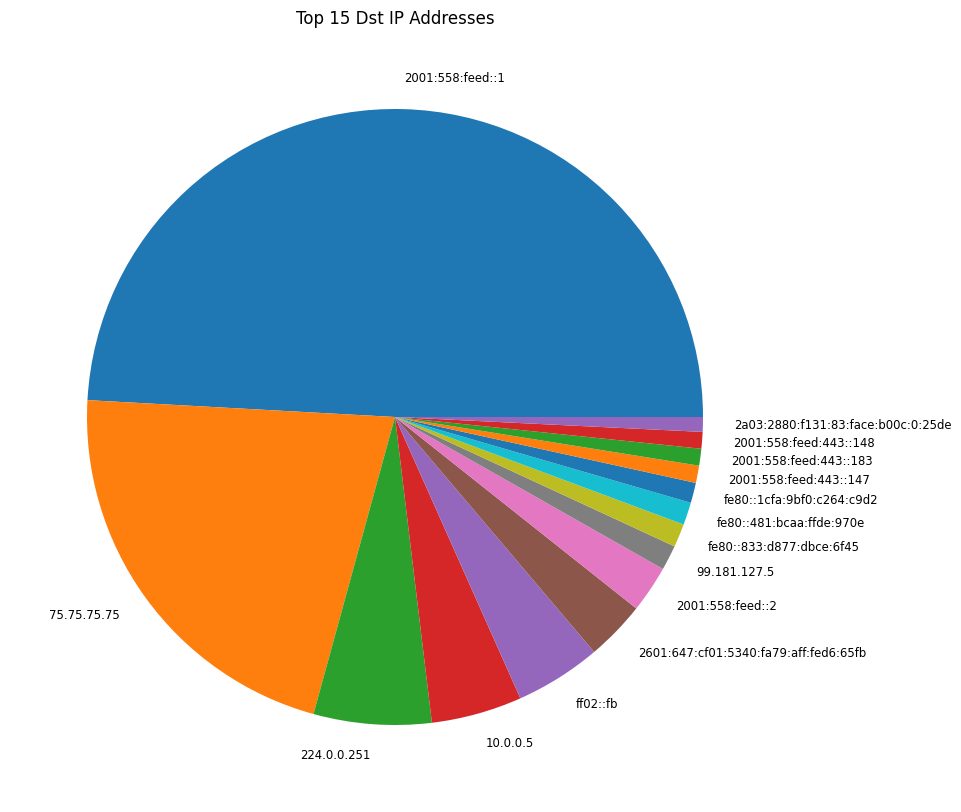

In [11]:
# Dst ip
ip_counts1 = v_data['dst_ip'].value_counts()[:15]
labels1 = ip_counts1.index
values1 = ip_counts1.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Top 15 Dst IP Addresses')
ax.pie(values1, labels=labels1,textprops={'size': 'smaller'});
print('Unique dst IPs', len(v_data['dst_ip'].value_counts()))
print(f'Total Conenctions', len((v_data)))

Unique dst Ports 403
Total Conenctions 589530


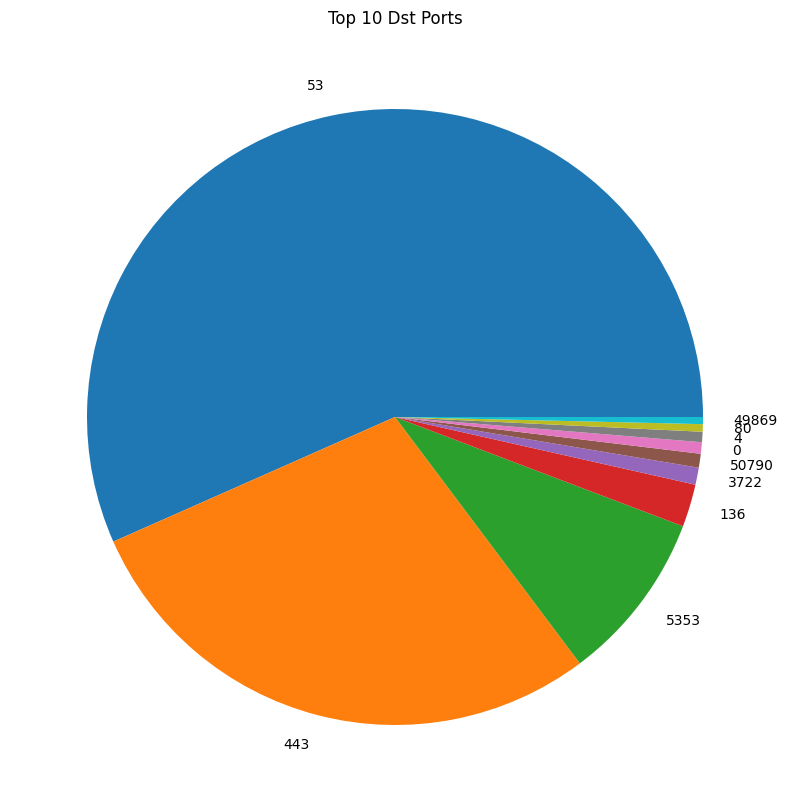

In [12]:
# Dst port
ip_counts = v_data['dst_p'].value_counts()[:10]
labels = ip_counts.index
values = ip_counts.values

fig, ax = plt.subplots()
ax.set_title('Top 10 Dst Ports')
fig.set_size_inches(10, 10)
ax.pie(values, labels=labels);

print('Unique dst Ports', len(v_data['dst_p'].value_counts()))
print(f'Total Conenctions', len((v_data)))

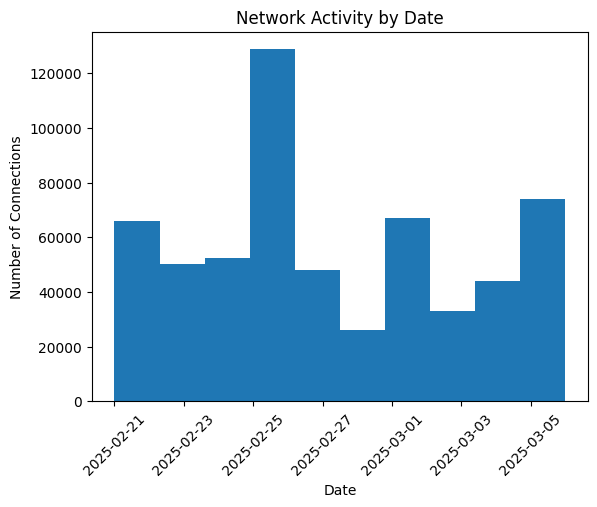

In [13]:
# Hist over time
plt.hist(v_data['ts'].dt.date, bins=10)  # Add bins for better visualization
plt.xlabel('Date')
plt.ylabel('Number of Connections')
plt.title('Network Activity by Date')
plt.xticks(rotation=45)
plt.show()

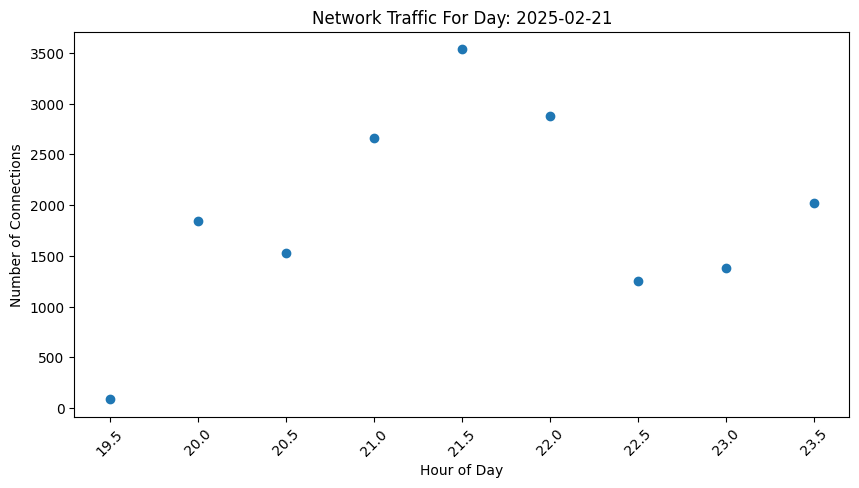

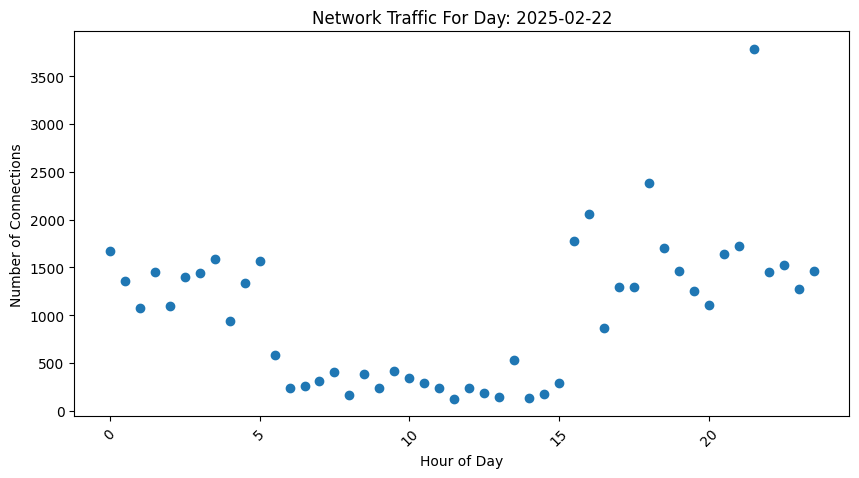

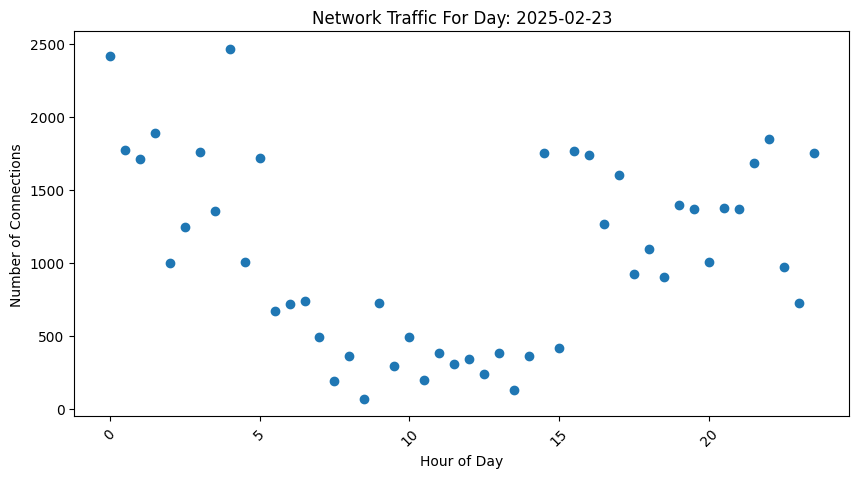

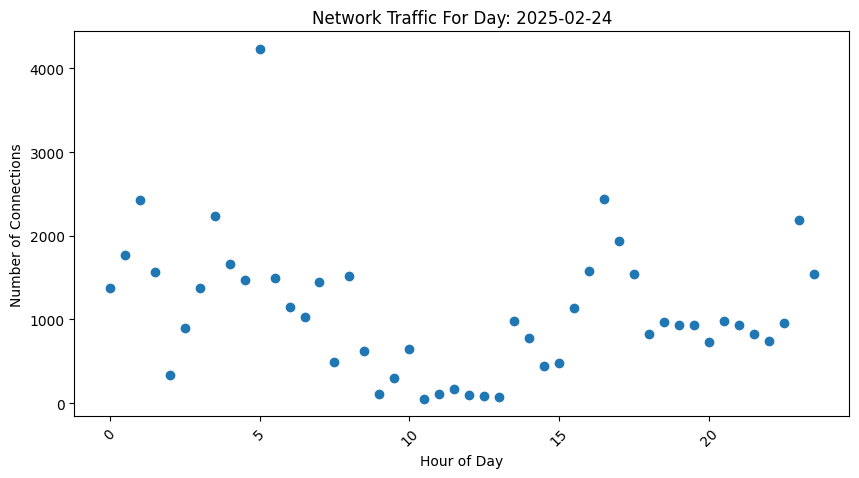

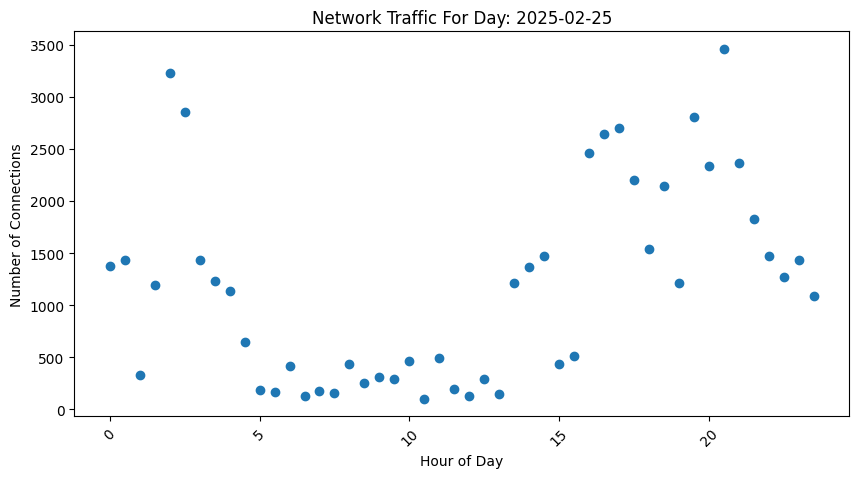

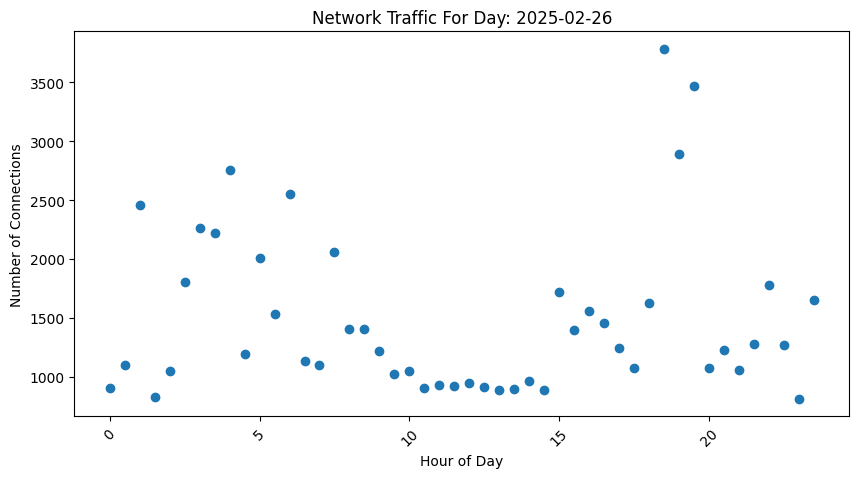

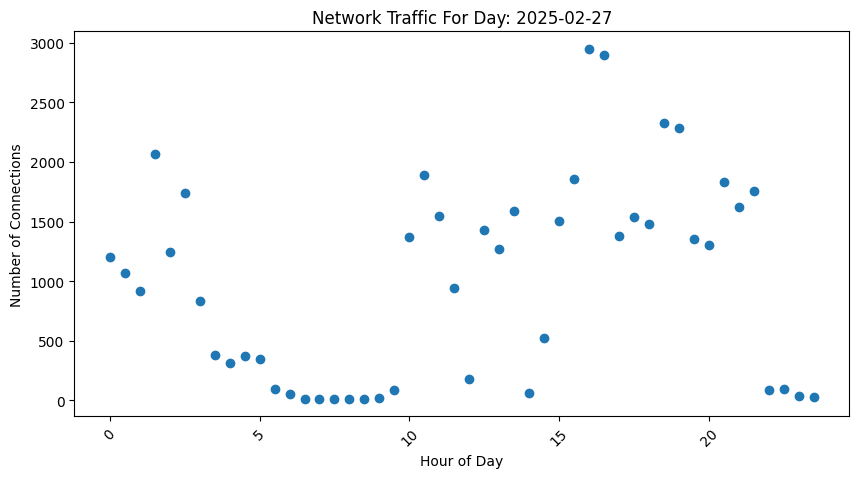

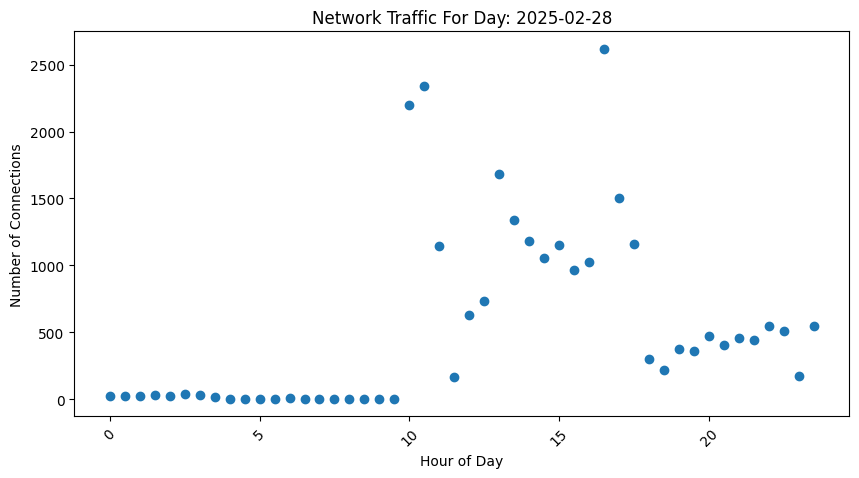

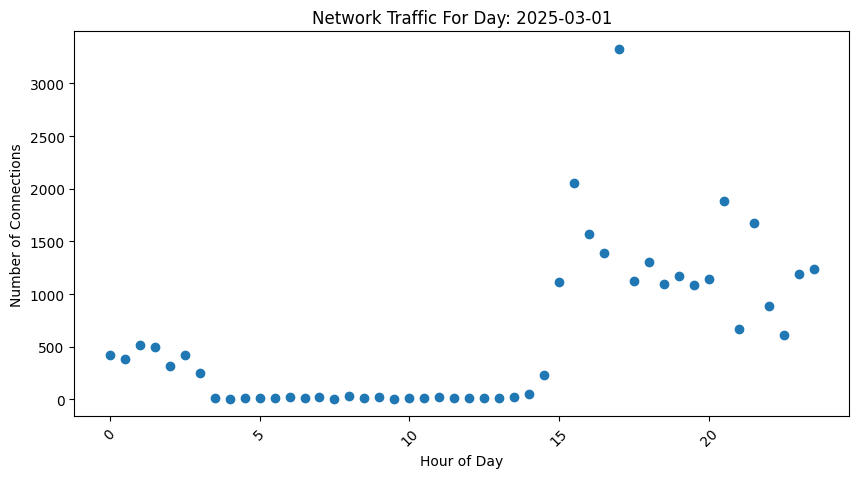

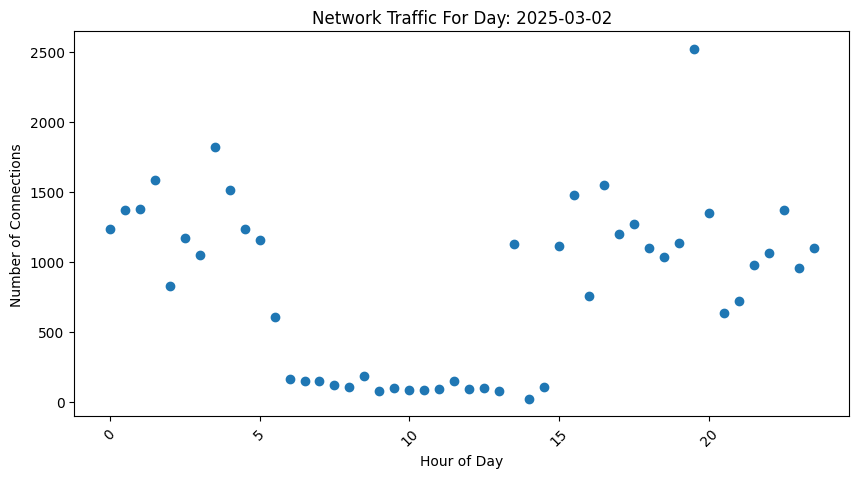

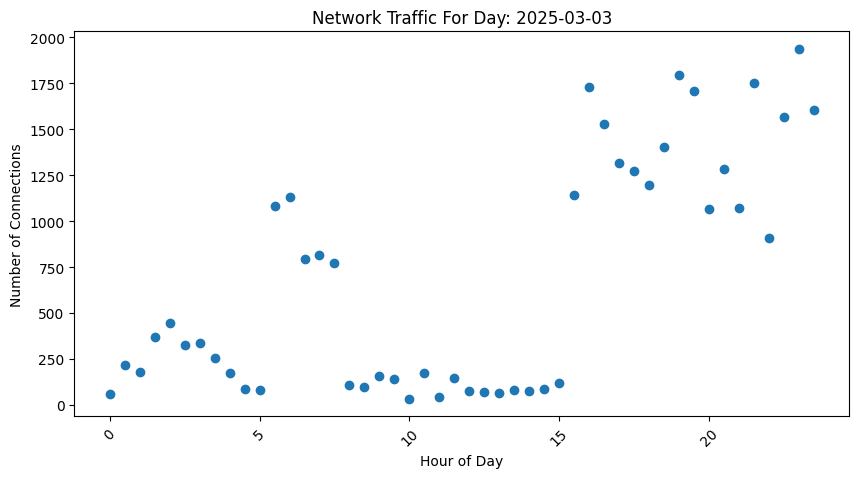

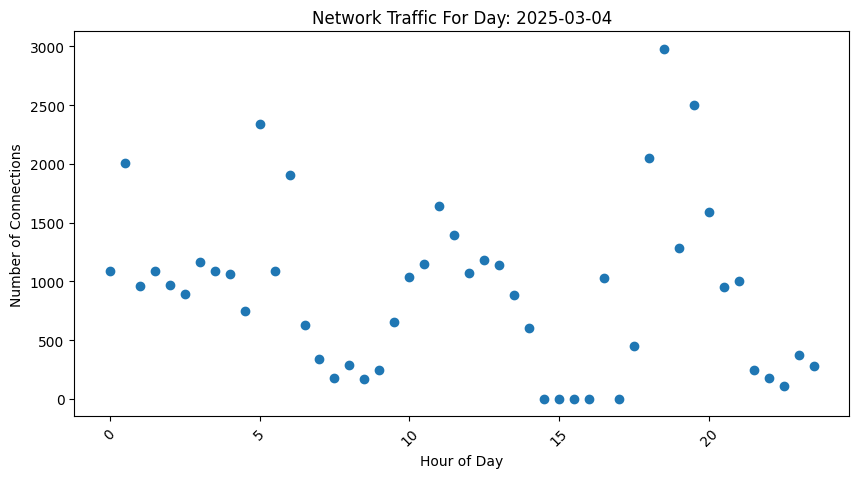

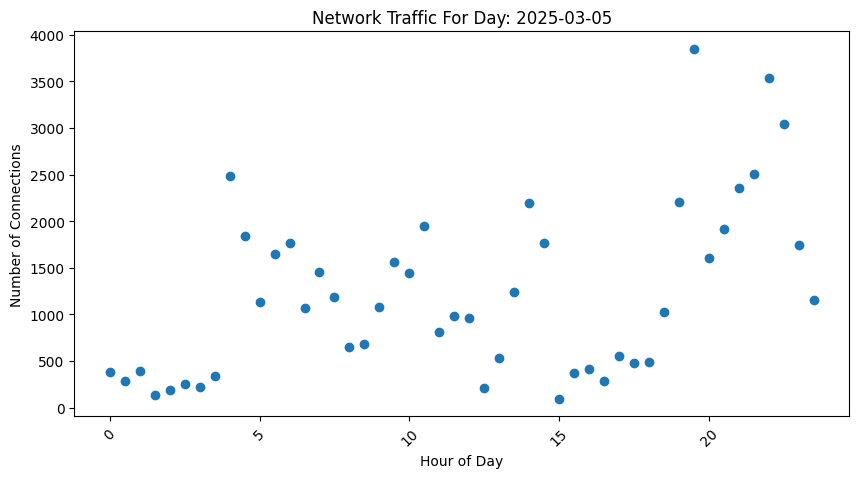

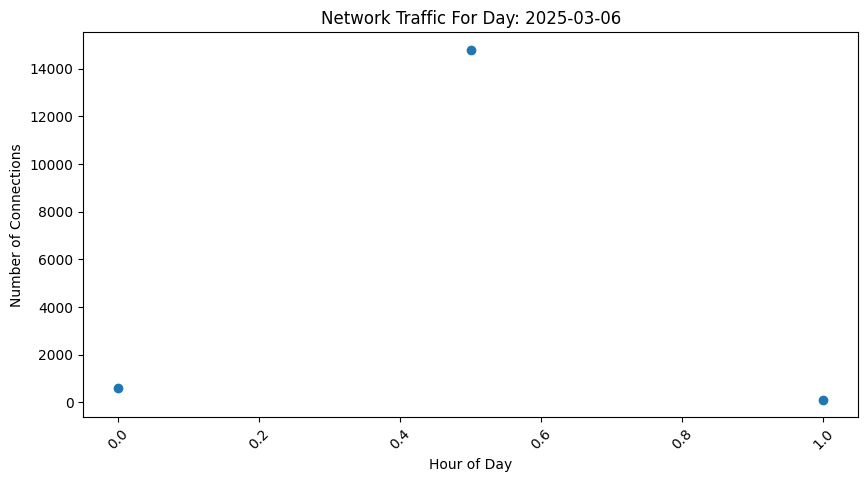

In [14]:
# By Day
mapping = {} # Timestamp to Size Mapping
count = 0
for group,value in v_data.groupby(pd.Grouper(key='ts', freq='D')):
  for groups,values in value.groupby(pd.Grouper(key='ts', freq='30min')):
      mapping[groups] = len(values)
df = pd.DataFrame(list(mapping.items()), columns=['Timestamp', 'Size'])
df
# Find how many unique days
# zeek_data['ts'].dt.date.nunique() = 14
length_ts = v_data['ts'].dt.date.nunique()

# See what dates are actually in each group
df['date'] = df['Timestamp'].dt.date
for date, day_data in df.groupby('date'):
    plt.figure(figsize=(10, 5))
    plt.title(f"Network Traffic For Day: {date}")
    plt.scatter(day_data['Timestamp'].dt.hour + day_data['Timestamp'].dt.minute/60, day_data['Size'])
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Connections')
    plt.xticks(rotation=45)
    plt.show()

proto
udp                  437883
tcp                  127802
icmp                  20476
unknown_transport      3369
Name: count, dtype: int64


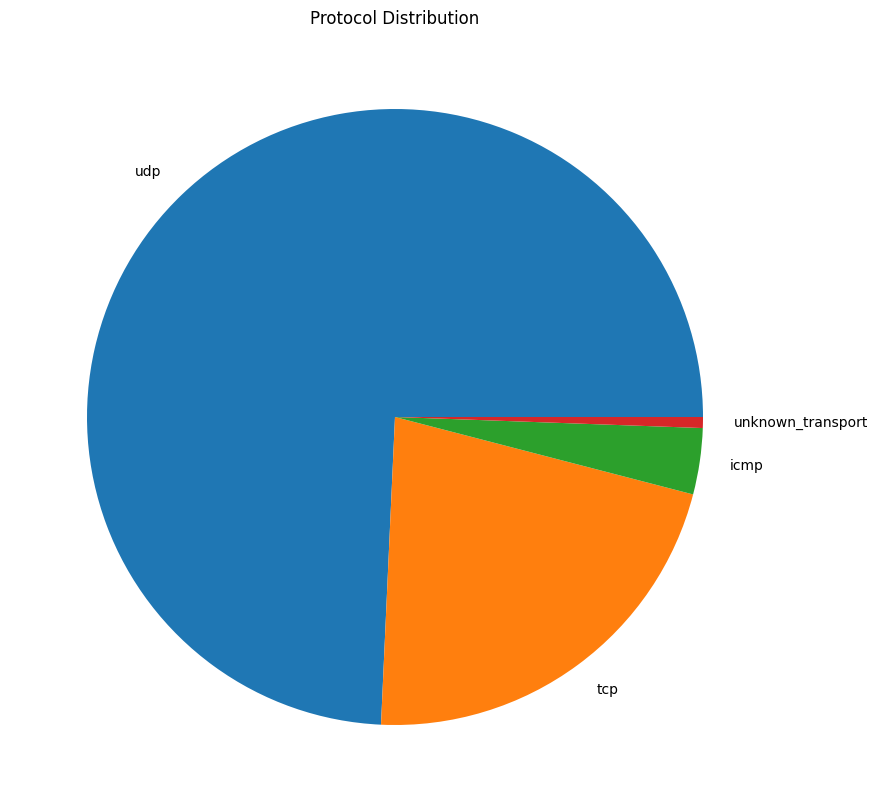

In [15]:
# Protocol Analysis
ip_counts2 = v_data['proto'].value_counts()[:20]
labels2 = ip_counts2.index
values2 = ip_counts2.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Protocol Distribution')
ax.pie(values2, labels=labels2);
print(ip_counts2)

service
dns         376330
ssl         103605
-            64756
quic,ssl     21931
quic         16527
Name: count, dtype: int64


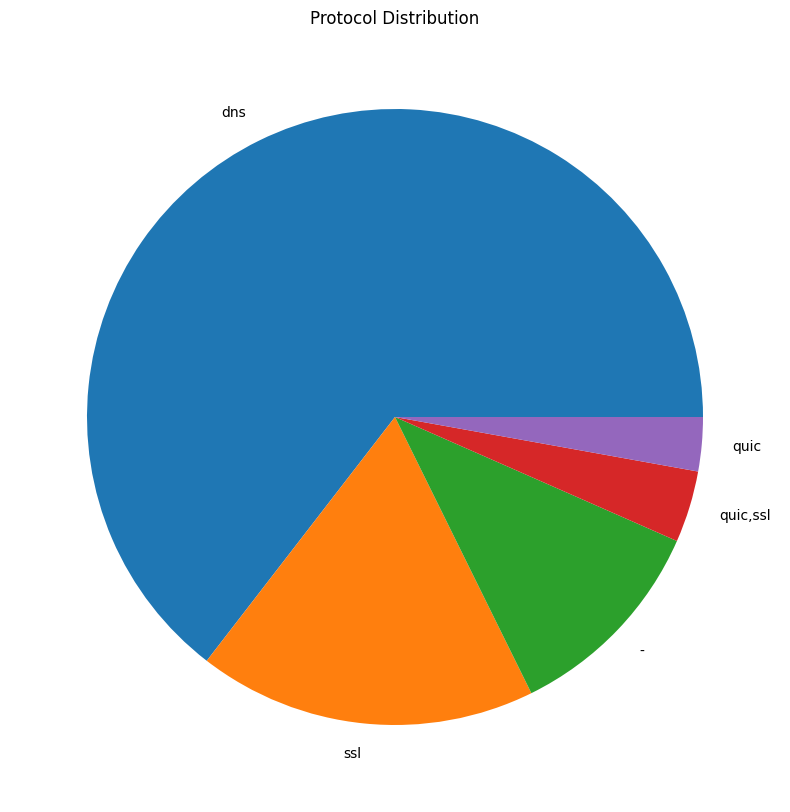

In [16]:
# Service Analysis
# "-" means unspecified i guess
ip_counts2 = v_data['service'].value_counts()[:5]
labels2 = ip_counts2.index
values2 = ip_counts2.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Protocol Distribution')
ax.pie(values2, labels=labels2);
print(ip_counts2)

In [37]:
# Specific to my IP 10.0.0.5

local_machine_src = v_data[v_data['src_ip'] == '10.0.0.5']

local_machine_dst = v_data[v_data['dst_ip'] == '10.0.0.5']
local_machine_src

,ts,uid,src_ip,src_p,dst_ip,dst_p,proto,service,duration,src_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,ip_proto
0,2025-02-21 19:55:46.358164072-08:00,Covuo43LyFTNEu1Cp7,10.0.0.5,65430,99.181.107.78,443,tcp,-,0.176656,0.0,...,OTH,T,F,0,^dAtt,34,1876,169,237196,6
1,2025-02-21 19:55:46.358163118-08:00,CGgOtJ35xc6GxibRug,10.0.0.5,65289,140.82.112.26,443,tcp,-,0.089289,24.0,...,SF,T,F,0,^dADFaRfR,6,300,5,325,6
2,2025-02-21 19:56:08.851763010-08:00,CX6Ki51nhyiL2A6494,10.0.0.5,65430,99.181.107.78,443,tcp,-,0.213978,1544.0,...,OTH,T,F,0,^dAttDa,29,3088,120,161605,6
73,2025-02-21 19:59:59.631752968-08:00,CMj14C3tuqmS3dkMw,10.0.0.5,5353,224.0.0.251,5353,udp,dns,5.311252,726.0,...,S0,T,F,0,D,4,838,0,0,17
80,2025-02-21 20:00:23.387157917-08:00,CkSHsn1EsZ5iQqwiC,10.0.0.5,5353,224.0.0.251,5353,udp,dns,7.000262,740.0,...,S0,T,F,0,D,4,852,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589515,2025-03-06 01:00:09.712822914-08:00,Cg4Mqe3WejDvf7PfGa,10.0.0.5,50840,75.75.76.76,53,udp,dns,1.025913,74.0,...,S0,T,F,0,D,2,130,0,0,17
589516,2025-03-06 01:00:09.919981003-08:00,CsQvJa3bzfk3Lshpxl,10.0.0.5,55082,75.75.76.76,53,udp,dns,1.035272,96.0,...,S0,T,F,0,D,2,152,0,0,17
589517,2025-03-06 01:00:09.919929981-08:00,ChMSQw23HKndeSkrg4,10.0.0.5,62370,75.75.76.76,53,udp,dns,1.035291,100.0,...,S0,T,F,0,D,2,156,0,0,17
589518,2025-03-06 01:00:09.920011044-08:00,CH5m5CiRJYYw0GMIb,10.0.0.5,58060,75.75.76.76,53,udp,dns,1.035244,96.0,...,S0,T,F,0,D,2,152,0,0,17


Unique src IPs 4245
Total Conenctions 196023
This makes up about 33.25072515393619% of the data


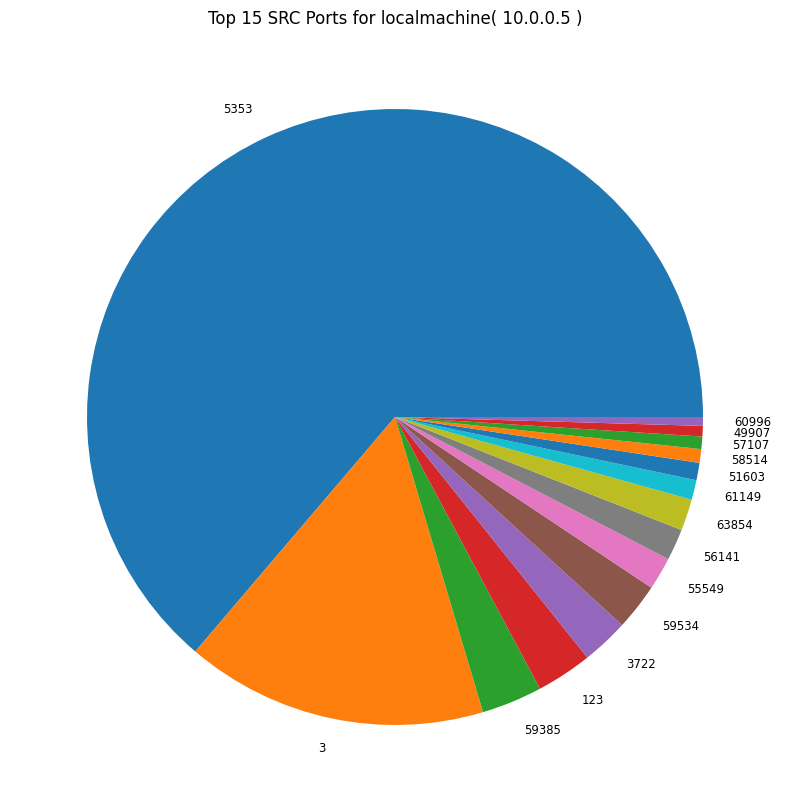

In [35]:
# most common src ports from '10.0.0.5'
ip_counts1 = local_machine_src['src_p'].value_counts()[:15]
labels1 = ip_counts1.index
values1 = ip_counts1.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Top 15 SRC Ports for localmachine( 10.0.0.5 )')
ax.pie(values1, labels=labels1,textprops={'size': 'smaller'});
print('Unique src Ports', len(local_machine_src['dst_ip'].value_counts()))
print(f'Total Conenctions', len((local_machine_src)))
print(f'This makes up about { (len(local_machine_src) / len(v_data)) * 100 }% of the data')

In [36]:
# Interesting lets say who are we communicating to on port 5353 and 3
local_machine_src_p_5353 = local_machine_src[local_machine_src['src_p'] == 5353]
local_machine_src_p_3 = local_machine_src[local_machine_src['src_p'] == 3]

print(local_machine_src_p_5353['dst_ip'].value_counts())
print(local_machine_src_p_3['dst_ip'].value_counts())
print(len(local_machine_src_p_5353['dst_ip'].value_counts()))
print(local_machine_src_p_5353)

dst_ip
224.0.0.251       4418
10.0.0.23          278
10.0.0.208         156
10.0.0.228          70
10.0.0.152          13
10.0.0.192          12
10.0.0.65           11
172.16.64.1         10
192.168.120.1       10
169.233.141.36       2
Name: count, dtype: int64
dst_ip
75.75.75.75       427
75.75.76.76        72
104.21.90.38       35
172.67.152.110     26
35.186.224.24      24
                 ... 
109.176.239.69      1
172.67.175.10       1
142.251.46.228      1
34.49.241.189       1
104.22.68.95        1
Name: count, Length: 206, dtype: int64
10
                                        ts                 uid    src_ip  \
73     2025-02-21 19:59:59.631752968-08:00   CMj14C3tuqmS3dkMw  10.0.0.5   
80     2025-02-21 20:00:23.387157917-08:00   CkSHsn1EsZ5iQqwiC  10.0.0.5   
160    2025-02-21 20:03:45.662853003-08:00  C2ZShX3lqdNlPlCkQe  10.0.0.5   
167    2025-02-21 20:04:16.544559956-08:00  CsC80N36Ypuf2rWFJ1  10.0.0.5   
272    2025-02-21 20:09:08.650110960-08:00   CJrUKG3YSUGRhkm0s  10

In [41]:
# Really so only about 4k packets of 5353 out of 196k are the most common
# lets see how dyanmic the port ranges are
print(local_machine_src['src_p'].describe())
local_machine_src['dst_p'].describe()
# ok so after the output based on the mean src port being ~55k

count    196023.000000
mean      55174.709769
std       10949.250599
min           3.000000
25%       52574.000000
50%       56641.000000
75%       61051.500000
max       65535.000000
Name: src_p, dtype: float64


,dst_p
count,196023.000000
mean,487.549767
std,1873.276172
min,0.000000
25%,53.000000
50%,443.000000
75%,443.000000
max,65158.000000


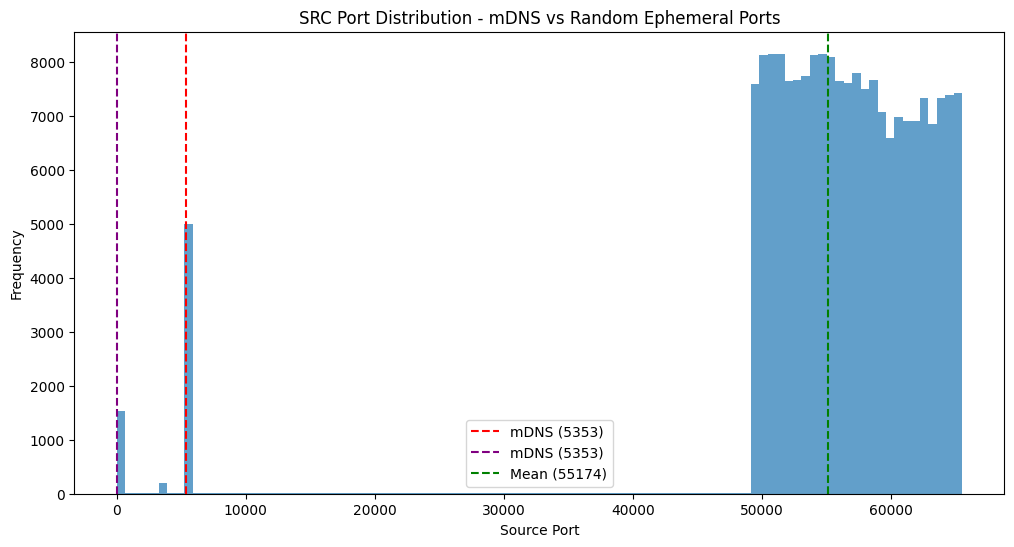

In [44]:
# Beautiful distribution, mdns 5353 is concentrated enough to be the most common yet 50000 - 65000 appear to be the most dense
plt.figure(figsize=(12, 6))
plt.hist(local_machine_src['src_p'], bins=100, alpha=0.7)
plt.axvline(x=5353, color='red', linestyle='--', label='mDNS (5353)')
plt.axvline(x=3, color='purple', linestyle='--', label='dns? (3)')
plt.axvline(x=55174, color='green', linestyle='--', label=f'Mean ({55174})')
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.title('SRC Port Distribution - mDNS vs Random Ephemeral Ports')
plt.legend()
plt.show()

Unique dst Ports 74
Total Conenctions 196023
This makes up about 33.25072515393619% of the data


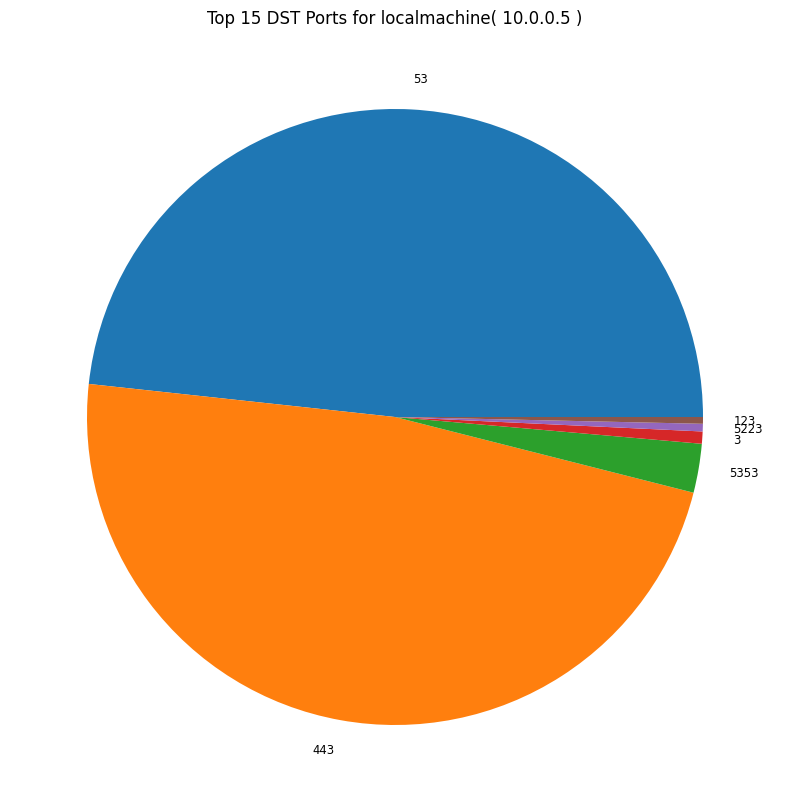

In [47]:
# ok now lets check out who we are sending data too source port then well hit ip's protocols etc
# most common dst ports from '10.0.0.5'
ip_counts1 = local_machine_src['dst_p'].value_counts()[:6]
labels1 = ip_counts1.index
values1 = ip_counts1.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Top 15 DST Ports for localmachine( 10.0.0.5 )')
ax.pie(values1, labels=labels1,textprops={'size': 'smaller'});
print('Unique dst Ports', len(local_machine_src['dst_p'].value_counts()))
print(f'Total Conenctions', len((local_machine_src)))
print(f'This makes up about { (len(local_machine_src) / len(v_data)) * 100 }% of the data')


In [48]:
# Cool, lets get a more numerical approach to see how it compares to our src port analysis:
local_machine_src['dst_p'].value_counts()[:6]

,count
dst_p,
53,93714
443,92685
5353,4980
3,1237
5223,773
123,682


Unique dst Ports 4245
Total Conenctions 196023
This makes up about 33.25072515393619% of the data


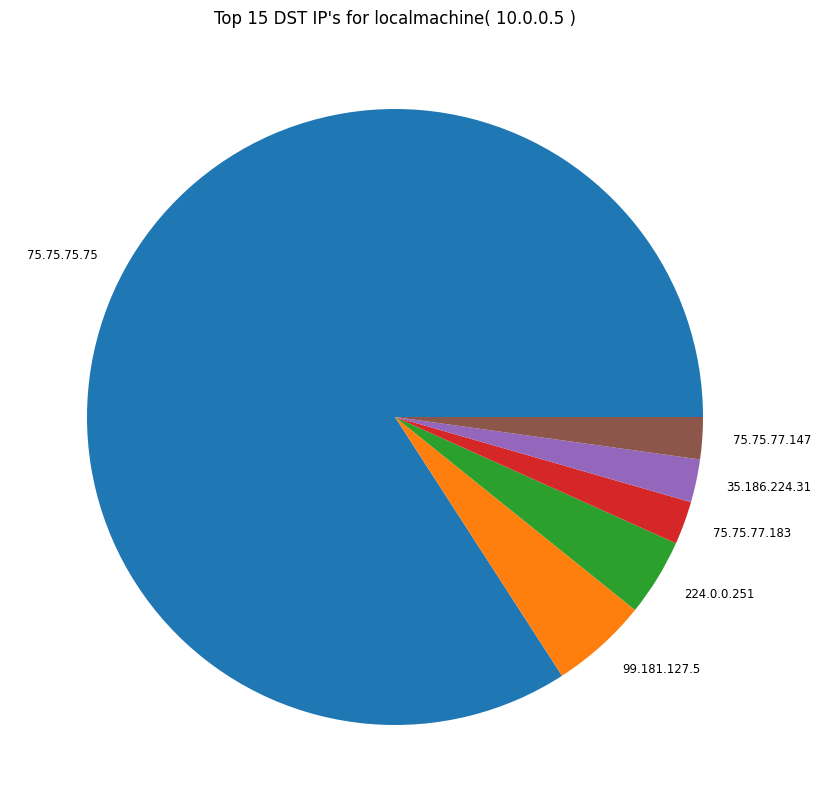

In [49]:
# now lets get to IP'S lets start with who our dst ip is:
# ok now lets check out who we are sending data too source port then well hit ip's protocols etc
# most common dst ports from '10.0.0.5'
ip_counts1 = local_machine_src['dst_ip'].value_counts()[:6]
labels1 = ip_counts1.index
values1 = ip_counts1.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Top 15 DST IP\'s for localmachine( 10.0.0.5 )')
ax.pie(values1, labels=labels1,textprops={'size': 'smaller'});
print('Unique dst Ports', len(local_machine_src['dst_ip'].value_counts()))
print(f'Total Conenctions', len((local_machine_src)))
print(f'This makes up about { (len(local_machine_src) / len(v_data)) * 100 }% of the data')


In [50]:
local_machine_src['dst_ip'].value_counts()[:6]

,count
dst_ip,
75.75.75.75,91685
99.181.127.5,5558
224.0.0.251,4418
75.75.77.183,2471
35.186.224.31,2457
75.75.77.147,2402


In [57]:
temp = local_machine_src[local_machine_src['dst_ip'] == '75.75.77.183']
# Not sure what this ip is its not resolvable via dns, but give a 400 when i try to connect via https

,ts,uid,src_ip,src_p,dst_ip,dst_p,proto,service,duration,src_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,ip_proto
28501,2025-02-22 03:48:05.843745947-08:00,Cp26P73xio4V5V7qHb,10.0.0.5,54714,75.75.77.183,443,tcp,ssl,1209.281551,986.0,...,SF,T,F,0,ShADdaFf,43,2922,42,8971,6
32474,2025-02-22 05:55:09.092250109-08:00,C1XYPH2QidehtQxWN2,10.0.0.5,55519,75.75.77.183,443,tcp,ssl,0.121654,1789.0,...,SF,T,F,0,ShADFadfRR,7,2141,9,6733,6
32475,2025-02-22 05:55:09.094968081-08:00,CxvUoF2tJJ6QayhTQl,10.0.0.5,55525,75.75.77.183,443,tcp,ssl,0.120474,1981.0,...,SF,T,F,0,ShADFadfR,7,2333,9,6733,6
32476,2025-02-22 05:55:09.094558954-08:00,Cq4snCPg6LNMy2jQ5,10.0.0.5,55523,75.75.77.183,443,tcp,ssl,0.121896,1981.0,...,SF,T,F,0,ShADFadRfRt,12,2533,13,12541,6
32477,2025-02-22 05:55:09.092492104-08:00,CFv46j32On1kZ2pvi,10.0.0.5,55520,75.75.77.183,443,tcp,ssl,0.127129,517.0,...,SF,T,F,0,ShADFadfRt,10,977,8,6681,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148054,2025-02-24 15:43:08.163065910-08:00,CNrJK513dyTF01Cff,10.0.0.5,52529,75.75.77.183,443,tcp,ssl,0.345392,2598.0,...,SF,T,F,0,ShADadFf,20,3650,21,8168,6
148057,2025-02-24 15:43:03.542119026-08:00,CojJZ21I4azDF7Y5Cj,10.0.0.5,52528,75.75.77.183,443,tcp,ssl,4.971755,2599.0,...,SF,T,F,0,ShADadFf,21,3703,21,8226,6
148060,2025-02-24 15:43:12.052814960-08:00,CLWlNc3XOHiw4yPuGf,10.0.0.5,52531,75.75.77.183,443,tcp,ssl,1.467858,3093.0,...,SF,T,F,0,ShADadFf,24,4353,28,8712,6
148061,2025-02-24 15:43:10.887208939-08:00,CRQFgE1QQeQGQvE7V3,10.0.0.5,52530,75.75.77.183,443,tcp,ssl,2.633466,3820.0,...,SF,T,F,0,ShADadFf,33,5548,42,10429,6


Unique dst IP\s 32
Total Conenctions 20190
This makes up about 3.424762098620935% of the data


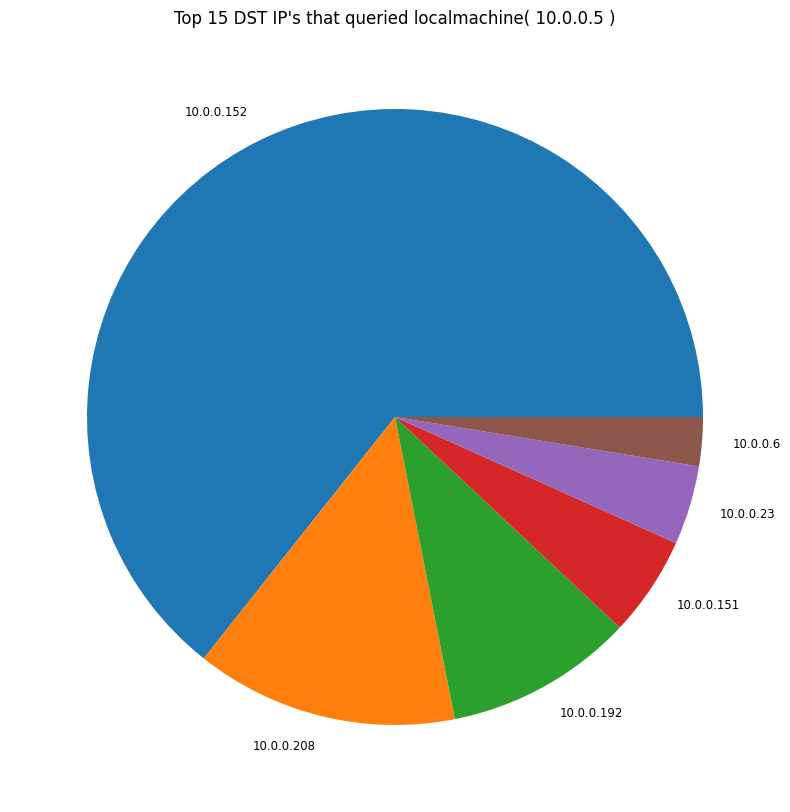

In [61]:
# Now lets analyze the data we recieved!
ip_counts1 = local_machine_dst['src_ip'].value_counts()[:6]
labels1 = ip_counts1.index
values1 = ip_counts1.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Top 15 DST IP\'s that queried localmachine( 10.0.0.5 )')
ax.pie(values1, labels=labels1,textprops={'size': 'smaller'});
print('Unique dst IP\s', len(local_machine_dst['src_ip'].value_counts()))
print(f'Total Conenctions', len((local_machine_dst)))
print(f'This makes up about { (len(local_machine_dst) / len(v_data)) * 100 }% of the data')



In [63]:
# Its all local data!
local_machine_dst['src_ip'].value_counts()

,count
src_ip,
10.0.0.152,12955
10.0.0.208,2774
10.0.0.192,1994
10.0.0.151,1061
10.0.0.23,835
10.0.0.6,517
10.0.0.228,12
10.0.0.1,5
10.0.0.65,3


Unique src Ports 4875
Total Conenctions 20190
This makes up about 3.424762098620935% of the data


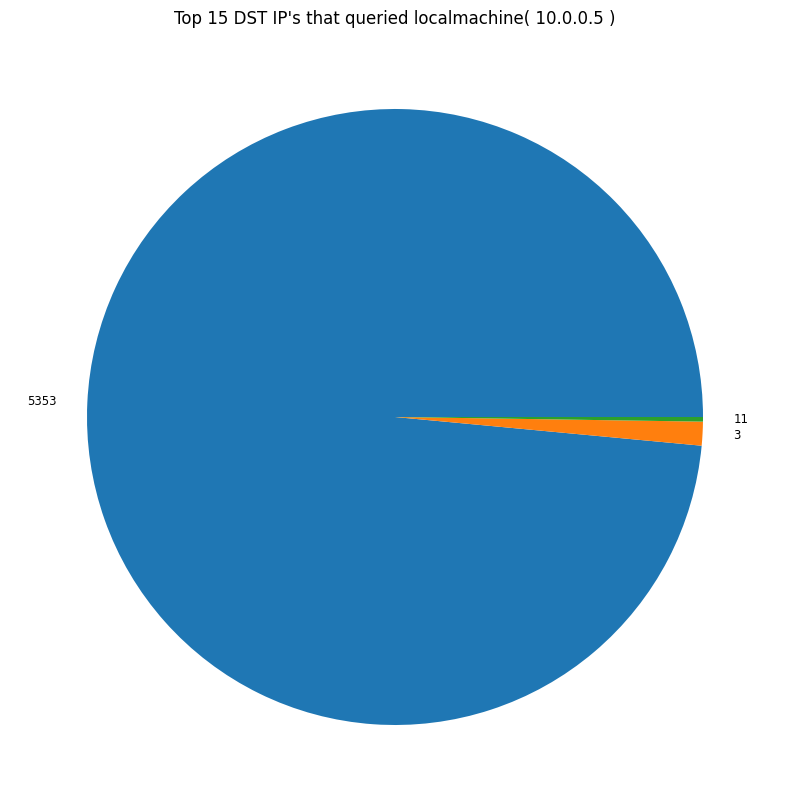

In [65]:
# Let's see what ports i recieved data on
# Now lets analyze the data we recieved!
ip_counts1 = local_machine_dst['src_p'].value_counts()[:3]
labels1 = ip_counts1.index
values1 = ip_counts1.values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_title('Top 15 ports that queried my localmachine( 10.0.0.5 )')
ax.pie(values1, labels=labels1,textprops={'size': 'smaller'});
print('Unique src Ports', len(local_machine_dst['src_p'].value_counts()))
print(f'Total Conenctions', len((local_machine_dst)))
print(f'This makes up about { (len(local_machine_dst) / len(v_data)) * 100 }% of the data')



In [18]:
# Pickle v_data
# visualization data
'''
PICKLE_FILE_PATH = os.path.join(PATH, "v_data.pkl")
print(f"\nSaving Dataframe to {PICKLE_FILE_PATH}")
data.to_pickle(PICKLE_FILE_PATH)
print("\n Pickled Saved!")
'''

'\nPICKLE_FILE_PATH = os.path.join(PATH, "v_data.pkl")\nprint(f"\nSaving Dataframe to {PICKLE_FILE_PATH}")\ndata.to_pickle(PICKLE_FILE_PATH)\nprint("\n Pickled Saved!")\n'

In [19]:
# Take out orig_ip_bytes resp_ip_bytes
# bytes_per_packet_orig = orig_bytes / orig_pkts
# bytes_per_packet_resp = resp_bytes / resp_pkts